In [1]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

## Import training data

In [5]:
path = os.getcwd() + '/' + 'ex1data1.txt'  
data = pd.read_csv(path, header=None, names=['X', 'Y'])  
#data.head()
data

,X,Y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [7]:
data.describe()

,X,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Data Plotting and Visualization

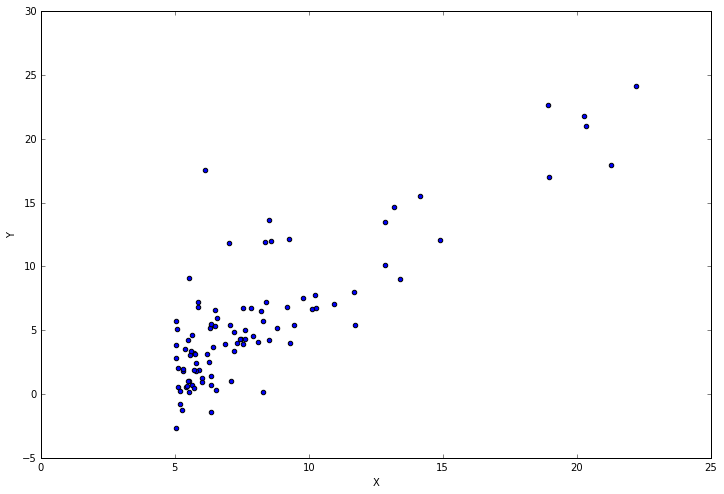

In [8]:
data.plot(kind='scatter', x='X', y='Y', figsize=(12,8))  

### Implementing 1 Dimensional Linear Regression

In [9]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [10]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]  

In [11]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0])) 

In [12]:
X.shape, theta.shape, y.shape  

((97, 2), (1, 2), (97, 1))

In [13]:
computeCost(X, y, theta) 

32.072733877455676

In [14]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    Wtheta = np.zeros(shape=(iters,2))
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)
        Wtheta [i,0] = theta[0,0]
        Wtheta [i,1] = theta[0,1]
        #print (theta)     
    return Wtheta, cost

In [15]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
W, cost = gradientDescent(X, y, theta, alpha, iters)  

In [17]:
x = np.linspace(data.X.min(), data.X.max(), 10) 

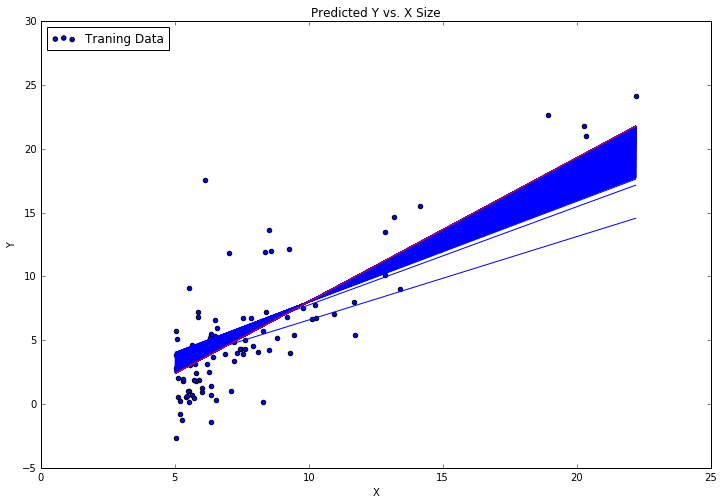

In [18]:
fig, ax = plt.subplots(figsize=(12,8)) 
for i in range(iters):
    f = W[i, 0] + (W[i, 1] * x)
    ax.plot(x, f, 'b') 
f = W[iters-1, 0] + (W[iters-1, 1] * x)
ax.plot(x, f,'r') 
ax.scatter(data.X, data.Y, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('X')  
ax.set_ylabel('Y')  
ax.set_title('Predicted Y vs. X Size')  

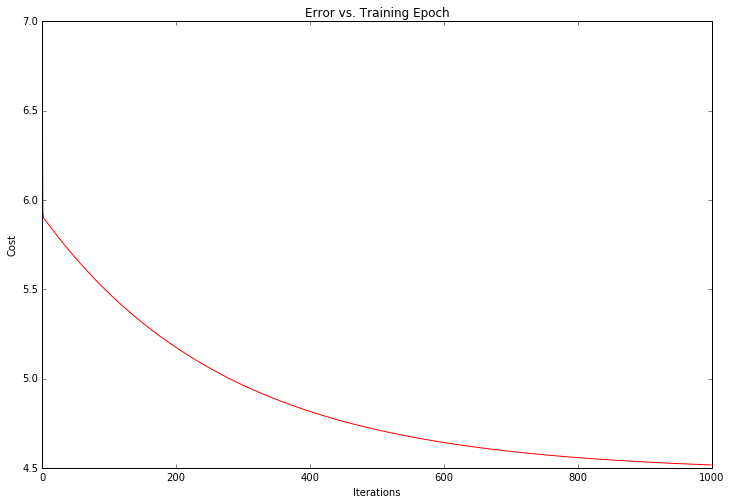

In [19]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 